# Inference for small GW strains

We have been generating timeseries and corner plots assuming some un-physically large value of the GW strain $h$.

What happens if we use these same techniques for smaller strains?

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

## 1. Example Kalman filterings


We can generate some synthetic data, and run the Kalman filter to see how well we recover the state.

The Kalman filter depends on a series of physical parameters (e.g. GW angular frequency). 

Lets assume we know these perfectly, and see how the filter does.

In [7]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict

### 1.1. Canonical example

Model likelihood is:  3811824.525522275175
Mean residual: -4.205954458382088327e-15


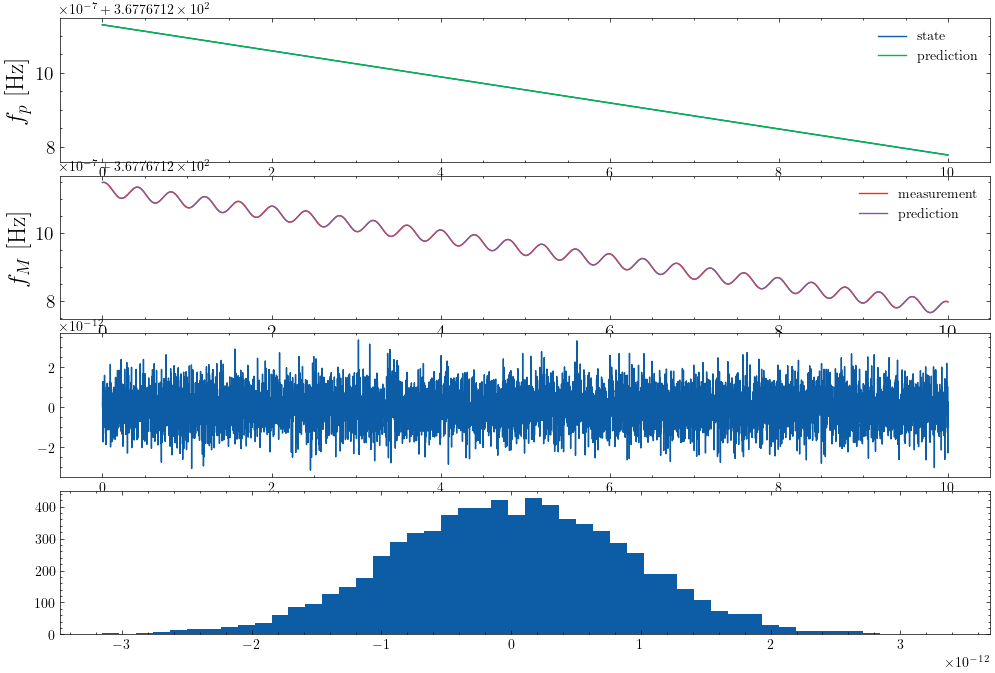

In [10]:
import numpy as np 

P    = SystemParameters(h=1e-10,σp=1e-15,σm=1e-12,Npsr=20,cadence=0.5,NF=np.longdouble)       #define the system parameters as a class
PTA  = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data

#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

# Run the KFwith the correct parameters
true_parameters = priors_dict(PTA,P)
model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(true_parameters)
print("Model likelihood is: ", model_likelihood)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, model_state_predictions_x,model_state_predictions_y, 1,savefig=None)


### 1.2. Drop float precision to `float64`


Note that we are working here using a long double. If we use the usual float64:

Model likelihood is:  3825514.556115788
Mean residual: 1.7271055210037284e-14


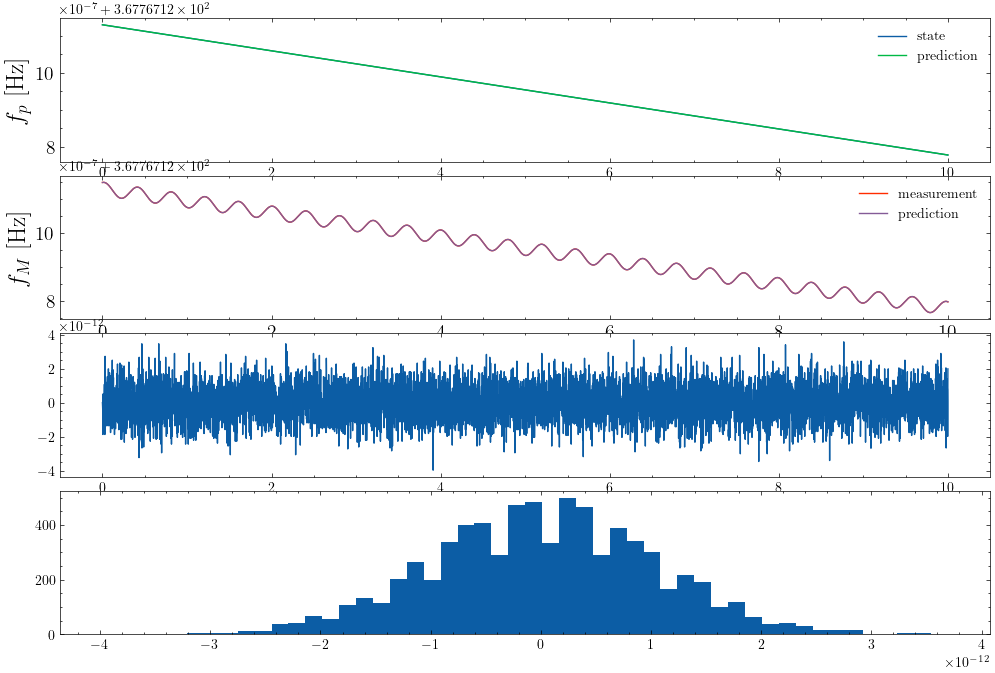

In [12]:
import numpy as np 

P    = SystemParameters(h=1e-10,σp=1e-15,σm=1e-12,Npsr=20,cadence=0.5,NF=np.float64)       #define the system parameters as a class
PTA  = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data

#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

# Run the KFwith the correct parameters
true_parameters = priors_dict(PTA,P)
model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(true_parameters)
print("Model likelihood is: ", model_likelihood)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, model_state_predictions_x,model_state_predictions_y, 1,savefig=None)


### 1.3 Drop the measurement noise 
If we make the measurement noise too small then we hit numerical issues, even when using `longdouble`

Model likelihood is:  4055713.921143113161
Mean residual: -1.545415241743633998e-16


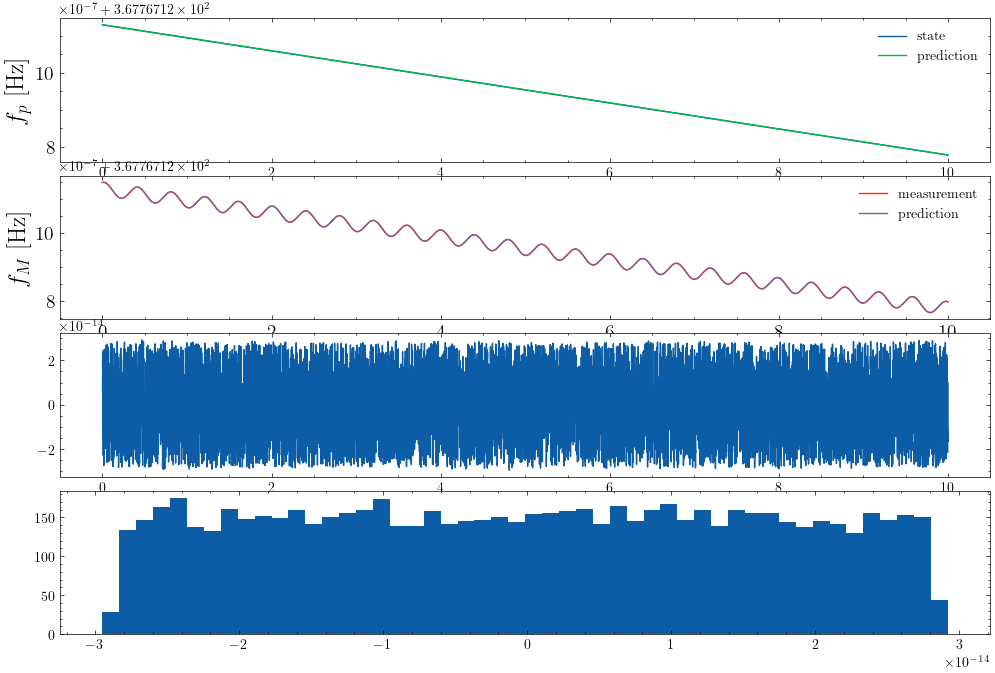

In [15]:
import numpy as np 

P    = SystemParameters(h=1e-10,σp=1e-15,σm=1e-14,Npsr=20,cadence=0.5,NF=np.longdouble)       #define the system parameters as a class
PTA  = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data

#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

# Run the KFwith the correct parameters
true_parameters = priors_dict(PTA,P)
model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(true_parameters)
print("Model likelihood is: ", model_likelihood)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, model_state_predictions_x,model_state_predictions_y, 1,savefig=None)


### 1.4 Canonical example with wrong parameters

Model likelihood is:  -142805563037.32117423
Mean residual: 1.7083972592755120262e-12


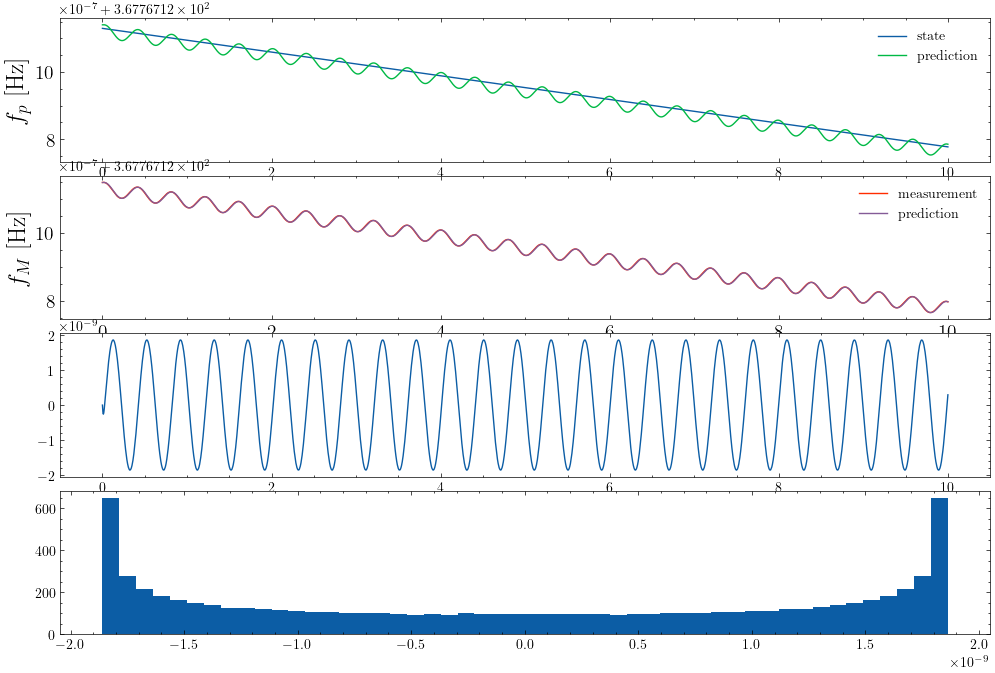

In [16]:
import numpy as np 

P    = SystemParameters(h=1e-10,σp=1e-15,σm=1e-12,Npsr=20,cadence=0.5,NF=np.longdouble)       #define the system parameters as a class
PTA  = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data

#Define the model 
model = LinearModel

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)

# Run the KFwith the correct parameters
true_parameters = priors_dict(PTA,P)

wrong_parameters = true_parameters.copy()
wrong_parameters["omega_gw"] =1e-9 #Change one of the parameters which is fed to the KF

model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(wrong_parameters)
print("Model likelihood is: ", model_likelihood)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, model_state_predictions_x,model_state_predictions_y, 1,savefig=None)
